In [2]:
import os
import random
from utils.snowflake_funcs import snowflake_connector  
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import numpy as np
from scipy import stats

## Load data

In [5]:
# load data from database by SQL

## Functions: calculate metrics

In [9]:
def calculate_avg_new_game_start(data):
    total_game_start = data['NUM_GAME_START'].sum()
    total_users = data['INSTALL_PK'].nunique()

    return total_game_start/total_users

## A/A test

In [22]:
game_start_difference_baseline = []

for i in range(0, 1000):
    # split data to treatment and control groups randomly
    treatment, control = train_test_split(data, test_size=0.5, shuffle=True)

    # calculate the mean of target metric
    t_game_start = calculate_avg_new_game_start(treatment)
    c_game_start = calculate_avg_new_game_start(control)

    # store the difference of mean from two groups
    game_start_difference_baseline.append(t_game_start - c_game_start)

game_start_difference_baseline

[0.000897388336074556,
 -0.002430130019835275,
 0.09879423955486288,
 -0.02948375957152649,
 0.06481744480493035,
 0.004446538993146731,
 0.004803076817701424,
 0.003982896103504885,
 0.057178832110068356,
 -0.02707496257493247,
 0.021709152730302606,
 -0.013772378246297734,
 0.0021273475129817143,
 -0.016897725412317044,
 0.1250421665283561,
 -0.07468303058156778,
 -0.027770558124259992,
 0.0602541297414767,
 0.061642948050103286,
 -0.02408364130655727,
 0.0321165180563554,
 0.10947063252996259,
 0.022401561149365534,
 -0.06630232031620764,
 0.07011626847171115,
 -0.06807080223423512,
 -0.023185932256289732,
 -0.015135394686826231,
 0.006039744024207039,
 -0.016575595173300428,
 -0.01777478580809344,
 -0.013165787112175309,
 -0.06115726725491655,
 -0.061842677247753386,
 0.024510713603891787,
 -0.1149602487764092,
 0.08848855159249425,
 -0.03179090305999921,
 -0.04014886283513519,
 -0.016424061231752773,
 0.023839666363546286,
 0.015221670196737591,
 0.011138695089826456,
 -0.05847856

## Result visualisation

<Axes: ylabel='Density'>

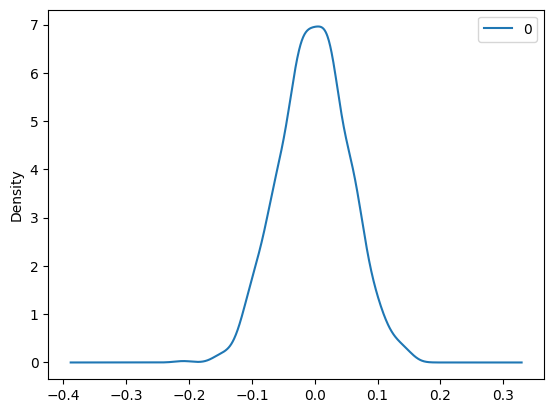

In [24]:
df_game_start_difference = pd.DataFrame(game_start_difference_baseline)
df_game_start_difference.plot.kde()

/var/folders/vx/w5z5d3dd317gflztcs29ll8h0000gn/T/ipykernel_1353/2622652607.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_game_start_difference)


Text(0.5, 1.0, 'Distribution of Differences Between Variants in the A/A Test without Variance Reduction Technique')

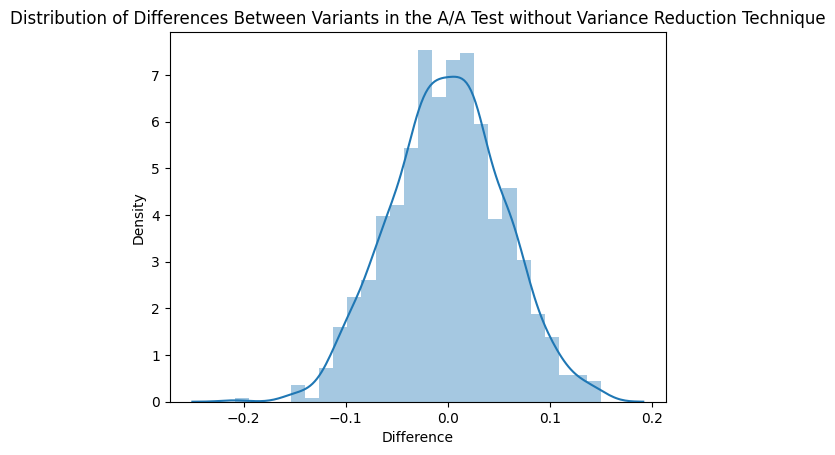

In [6]:
sns.distplot(df_game_start_difference)
plt.xlabel('Difference')
plt.ylabel('Density')


In [26]:
df_game_start_difference.to_pickle('result/baseline.pkl')